<a href="https://colab.research.google.com/github/michaelryanka/ASG-PYTN-H8-Batch-062/blob/main/PYTN_Final_Project_Batch_062_Muhammad_Michael_Ryanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PENGENALAN**

**Final Project Hacktiv8**

Pada final project ini saya menggunakan dataset mengenai UK used car price, jumlah data ini berjumlah 4960 mobil lama/mobil yang sudah digunakan. Tujuan project ini adalah untuk memprediksi harga yang cocok untuk menjual mobil-mobil lama/mobil yang sudah digunakan sebagai perbandingan dengan harga pasar pada mobil-mobil baru.

Sumber :https://www.kaggle.com/kukuroo3/used-car-price-dataset-competition-format?select=X_test.csv
 


**Import Library**

Pertama kita melakukan import library terlebih dahulu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


**Data Loading & Exploratory Data Analysis**

Setelah melakukan import library, kita melakukan import data yang sudah di download

In [ ]:
Xtrain = pd.read_csv('X_train.csv')
ytrain = pd.read_csv('y_train.csv')
Xtest = pd.read_csv('X_test.csv')
ytest = pd.read_csv('y_test.csv')


Setelah melakukan import data, disini kita menggabungkan dua data train menggunakan fungsi concat

In [ ]:
df = pd.concat([Xtrain,ytrain], axis=1)
df.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,carID,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,13207,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,17314,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,12342,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,13426,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16004,16990


Dikarenakan ada dua kolom carID dan menurut saya carID tidak terlalu diperlukan untuk prediksi harga mobil, saya melakukan drop pada kolom carID

In [ ]:
df.drop(df.columns[-2],axis=1,inplace=True)
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4960 non-null   object 
 1   model         4960 non-null   object 
 2   year          4960 non-null   int64  
 3   transmission  4960 non-null   object 
 4   mileage       4960 non-null   int64  
 5   fuelType      4960 non-null   object 
 6   tax           4960 non-null   float64
 7   mpg           4960 non-null   float64
 8   engineSize    4960 non-null   float64
 9   price         4960 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 387.6+ KB


In [ ]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,2016.737903,24956.286895,152.332661,50.370766,2.124375,23469.943750
std,2.884035,24443.333662,82.403844,35.746505,0.789368,16406.714563
min,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,2016.000000,5641.250000,145.000000,38.700000,1.600000,12000.000000
50%,2017.000000,19000.000000,145.000000,47.100000,2.000000,18999.000000
75%,2019.000000,36702.000000,150.000000,54.300000,2.800000,30335.750000
max,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


In [ ]:
df.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

Disini saya membuat count dari jumlah mobil yang terjual berdasarkan brand dan model. Setelah terbuat df_count, saya tambahkan ke dataset df dengan menggunakan merge

In [ ]:
df_counts = df.value_counts(["brand", "model"]).reset_index(name='counts')
df_counts

,brand,model,counts
0,vw,Arteon,167
1,ford,Grand C-MAX,164
2,vw,Scirocco,163
3,toyota,Prius,154
4,hyundi,Santa Fe,150
...,...,...,...
85,bmw,Z3,5
86,vw,Caddy,5
87,hyundi,Getz,4
88,merc,CLK,4


In [ ]:
#buat data baru dari hasil merge
df_new = pd.merge(df,df_counts, on =['brand', 'model'], how ='inner')
df_new

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,counts
0,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995,150
1,hyundi,Santa Fe,2019,Automatic,9970,Diesel,145.0,39.2,2.2,31269,150
2,hyundi,Santa Fe,2016,Automatic,20960,Diesel,235.0,42.8,2.2,16999,150
3,hyundi,Santa Fe,2009,Manual,95000,Diesel,305.0,38.7,2.2,4495,150
4,hyundi,Santa Fe,2017,Semi-Auto,37123,Diesel,150.0,42.8,2.2,19899,150
...,...,...,...,...,...,...,...,...,...,...,...
4955,skoda,Roomster,2015,Manual,36198,Petrol,150.0,49.6,1.2,6995,7
4956,skoda,Roomster,2012,Manual,54000,Petrol,145.0,49.6,1.2,5290,7
4957,skoda,Roomster,2015,Manual,80059,Petrol,145.0,49.6,1.2,4738,7
4958,skoda,Roomster,2013,Manual,21462,Petrol,145.0,49.6,1.2,6099,7


Disini saya mengubah tahun dari mobil-mobil lama menjadi Age, tujuan nya agar terlihat berapa umur dari setiap mobil lama yang dijual di tahun 2021

In [ ]:
df_new['year'] = 2021 - df_new['year']
df_new = df_new.rename(columns={"year":"age"})
df_new

,brand,model,age,transmission,mileage,fuelType,tax,mpg,engineSize,price,counts
0,hyundi,Santa Fe,2,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995,150
1,hyundi,Santa Fe,2,Automatic,9970,Diesel,145.0,39.2,2.2,31269,150
2,hyundi,Santa Fe,5,Automatic,20960,Diesel,235.0,42.8,2.2,16999,150
3,hyundi,Santa Fe,12,Manual,95000,Diesel,305.0,38.7,2.2,4495,150
4,hyundi,Santa Fe,4,Semi-Auto,37123,Diesel,150.0,42.8,2.2,19899,150
...,...,...,...,...,...,...,...,...,...,...,...
4955,skoda,Roomster,6,Manual,36198,Petrol,150.0,49.6,1.2,6995,7
4956,skoda,Roomster,9,Manual,54000,Petrol,145.0,49.6,1.2,5290,7
4957,skoda,Roomster,6,Manual,80059,Petrol,145.0,49.6,1.2,4738,7
4958,skoda,Roomster,8,Manual,21462,Petrol,145.0,49.6,1.2,6099,7


**Data Visualization**

Disini kita melakukan visualisasi untuk melihat jumlah mobil berdasarkan brand yang ada pada data 

In [ ]:
#menampilkan jumlah brand yang ada pada data
df_brand = df_new['brand'].value_counts()

# mengubah bentuknya menjadi dataframe dan menjadikan Brand sebagai index nya
df_brand = pd.DataFrame(df_brand)
df_brand =df_brand.reset_index()
df_brand.columns = ['Brand', 'Value'] 
df_brand = df_brand.set_index('Brand')
df_brand

,Value
Brand,
merc,790
vw,768
ford,766
bmw,638
hyundi,511
toyota,446
skoda,425
audi,343
vauxhall,273


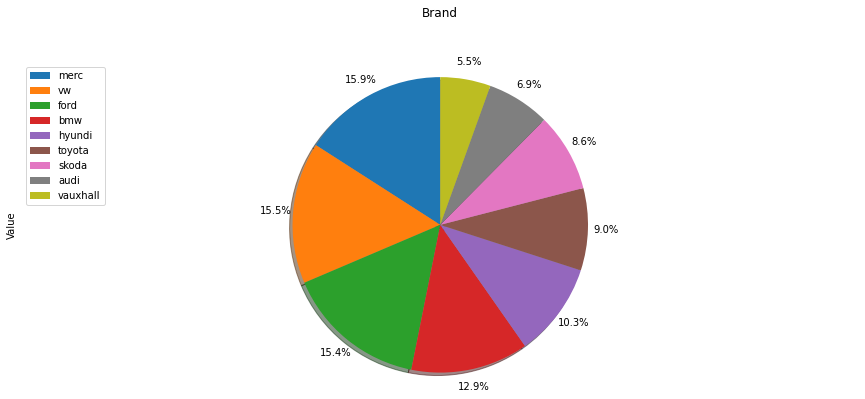

In [ ]:
#Visualisasi jumlah brand mobil lama yang ada pada dataset
df_brand['Value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,        
                            pctdistance=1.12,     
                            )
plt.title('Brand', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_brand.index, loc='upper left') 
plt.show()

Kesimpulan dari visualisasi Piechart diatas adalah, brand Mercedes,Volkswagen dan Ford adalah brand mobil yang terbanyak dibandingkan brand mobil lain nya

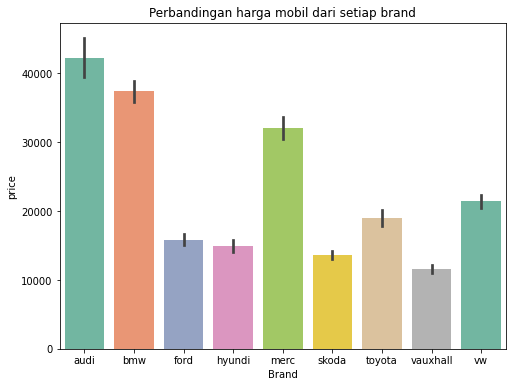

In [ ]:
#menampilkan brand dan harga dari mobil
brand_price= df_new.groupby(['brand', 'price']).size().reset_index()

#melakukan visualisasi berdasarkan brand dan harga mobil
plt.figure(figsize = (8,6))
sns.barplot(data = brand_price, x = 'brand', y = 'price', palette = 'Set2')
plt.title("Perbandingan harga mobil dari setiap brand")
plt.xlabel("Brand")
plt.show()

Kesimpulan dari visualisasi Barchart diatas adalah brand Audi memiliki price yang terbesar dibandingkan brand-brand mobil lain nya

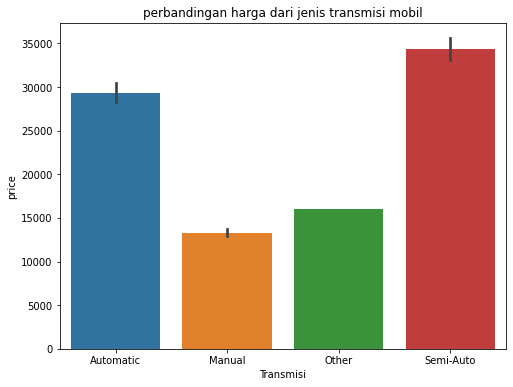

In [ ]:
#menampilkan transmisi dan harga dari mobil
price_ts= df_new.groupby(['transmission', 'price']).size().reset_index()

#melakukan visualisasi berdasarkan transmisi dan harga mobil
plt.figure(figsize = (8,6))
sns.barplot(data = price_ts, x = 'transmission', y = 'price')
plt.title("perbandingan harga dari jenis transmisi mobil")
plt.xlabel("Transmisi")
plt.show()

Kesimpulan dari visualisasi Barchat diatas adalah transmisi Semi-Auto dan Automotic memiliki harga yang terbesar dibandingkan transmisi lain nya

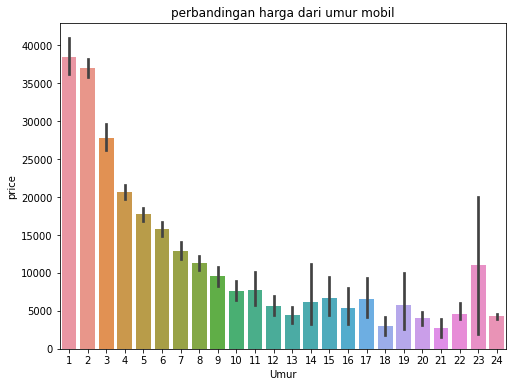

In [ ]:
#menampilkan umur dan harga mobil
price_age= df_new.groupby(['age', 'price']).size().reset_index()

#melakukan visualisasi berdasarkan umur dan harga mobil
plt.figure(figsize = (8,6))
sns.barplot(data = price_age, x = 'age', y = 'price')
plt.title("perbandingan harga dari umur mobil")
plt.xlabel("Umur")
plt.show()

Kesimpulan dari visualisasi Barchart diatas adalah, untuk mobil yang masih berumur 1 tahun dan 2 tahun memiliki harga yang berada diatas 35 ribu. Sedangkan harga mobil yang sudah berumur lebih dari 2 tahun akan lebih kecil.

**Pengaplikasian Linear Regression Model**

Pertama kita melakukan Data Preprocessing terlebih dahulu

In [ ]:
encode = preprocessing.LabelEncoder()
df_new['brand']=encode.fit_transform(df_new['brand'])
df_new['model']=encode.fit_transform(df_new['model'])
df_new['age']=encode.fit_transform(df_new['age'])
df_new['transmission']=encode.fit_transform(df_new['transmission'])
df_new['mileage']=encode.fit_transform(df_new['mileage'])
df_new['fuelType']=encode.fit_transform(df_new['fuelType'])
df_new['tax']=encode.fit_transform(df_new['tax'])
df_new['mpg']=encode.fit_transform(df_new['mpg'])
df_new['engineSize']=encode.fit_transform(df_new['engineSize'])
df_new['price']=encode.fit_transform(df_new['price'])

In [ ]:
x = df_new.drop('price', axis=1)
y = df_new['price']

Setelah melakukan Data Preprocessing, tahapan selanjutnya adalah pelatihan model. Alasan mengapa saya menggunakan model Linear Regression karena regression berguna saat memprediksi masalah berbasis angka, contohnya adalah seperti project ini yaitu memprediksi angka harga mobil

In [ ]:
#Melakukan pelatihan model LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg =LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Hasil Model
#menampilkan coefficient of determination (𝑅²), R2_score adalah sebuah nilai yang menyatakan seberapa sesuai hasil prediksi model mendekati data yang sebenarnya
r_sq = linreg.score(x_test, y_test)

#kita dapat melihat bahwa .intercept_ adalah scalar, sedangkan .coef_ adalah array
intercept, coefficients = linreg.intercept_, linreg.coef_


print('coefficient of determination:', r_sq)
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')


coefficient of determination: 0.8234170049303999
intercept: 1105.949707907823
coefficients:
[-11.40077669   1.3747114  -78.54988095  14.92554551  -0.1487817
 -12.32224284   0.24232117  -1.69754464  51.03047749  -0.38143695]


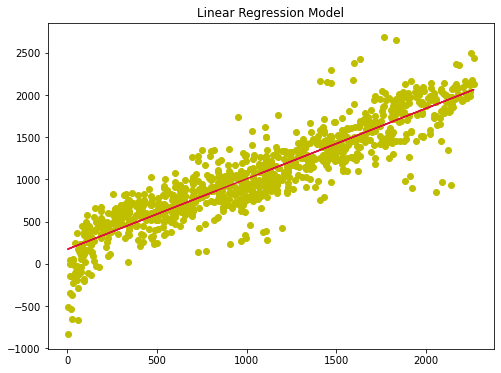

In [ ]:
#melakukan visualisasi model linear regression
y_predict = linreg.predict(x_test)
X = y_test
Y = y_predict

plt.figure(figsize = (8,6))
plt.title("Linear Regression Model")
plt.plot(X, Y, 'o', color = 'y')

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m * X + b, color = 'crimson')

**Kesimpulan**

Kesimpulan dari pengerjaan Final Project Hacktiv8

**Dataset**: UK Used car price dataset

**Objective**: Tujuan dari project ini adalah melakukan visualisasi dan prediksi dalam membantu orang-orang untuk menentukan harga mobil bekas yang sesuai untuk dijual.

**Result**: 

*   Visualisasi yang ditampilkan berisi informasi ringkas mengenai mobil dan harga mobil, tujuan dari visualisasi adalah sebagai perbandingan dalam menentukan harga mobil.
*   Disini untuk melakukan prediksi tersebut, saya menggunakan model Linear Regression. Model Linear Regression menghasilkan akurasi yang tinggi, yaitu menghasilkan akurasi sebesar 82%

